# Chapter 3: Tour de Learning Classifers


# 3-1 Training a Perceptron via Scikit Learn

**Perceptron**: A one-vs-Rest [OvR] method for multiclass classification. Decides whether an input, represented by a vector of numbers, belongs to some specific class or not.

First train via fit() then predict over test set.

[OvR]: https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest

In [1]:
from sklearn import datasets
import numpy as np

###### Data Prep #####
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target

#simple 70/30 train/test random splitting
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Applying feature scaling to data set
## Example: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Evaluate the Perceptron

In [2]:


from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# now train via the fit method #
ppn.fit(x_train_std, y_train)

# predict #
## %d is placeholder for number / %s placeholder for string
y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print 'Accuracy Score: ' + str((1.0-((y_test != y_pred).sum()*1.0)/(y_test.size*1.0)).round(2)*100) + '%'
#or import default performance metrics
from sklearn.metrics import accuracy_score
print('Accuracy Score de sklearn: %.2f' % accuracy_score(y_test, y_pred))
#PSA: need to beware of over-fitting!

Misclassified samples: 4
Accuracy Score: 91.0%
Accuracy Score de sklearn: 0.91


### Visualize Decision Regions of Perceptron

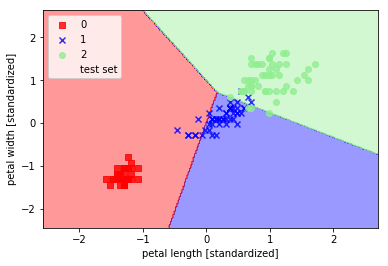

In [3]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# setup marker generator and color map #
def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface #
    x1_min, x1_max = x[:,0].min()-1,x[:,0].max()+1
    x2_min, x2_max = x[:,1].min()-1,x[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                           np.arange(x2_min,x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    # plot los samples #
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],y=x[y==cl,1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker=markers[idx],
                    label=cl)

    # highlight test samples #
    if test_idx:
        x_test, y_test = x[test_idx,:],y[test_idx]
        plt.scatter(x_test[:,0],x_test[:,1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55,
                    label='test set')
    
# Now specify indices for plt #
x_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(x=x_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()



# 3-2 Modeling class probabilities via logistic regression

logit(p) = log${\frac{p}{1-p}}$

inverse logit becomes logistic: $\phi(z)={\frac{1}{1+e^{-z}}}$

### Plot Sigmoid function (inverse logit aka logistic) to see how it looks
$\phi\to 1$ as $z\to\infty$

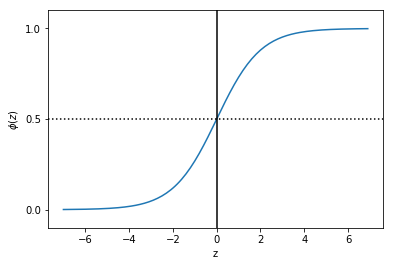

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()


### Training a logistic with scikit-learn

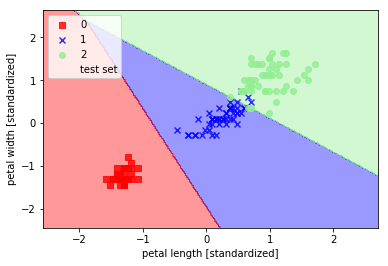

In [6]:
from sklearn.linear_model import LogisticRegression
#C is mysterious parameter being defined
#random_state=0 
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [8]:
# Display prediction probabilities #
lr.predict_proba(x_test_std[0,:])

/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

### Tracking overfitting via regularization

Underfitting = High-bias | Overfitting = High-variance

To find a good bias-variance tradeoff in model fitting, regularization  can be used to hanlde collinearity, filter out noise from data, and eventually prevent overfitting. Regularization inroduced additional information (bias) to penalize extreme parameter weights.

L2 regularization is the most common form.

For regularization to work properly, we need to ensure that all oour features are on comparable scales (feature scaling)

Below, weight coeffients for 10 logistics are charted over increasing regularization factors.

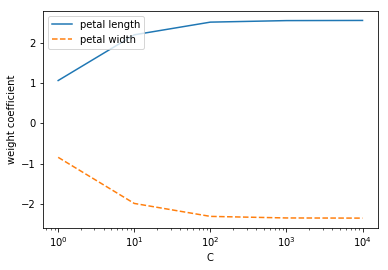

In [11]:
weights, params = [], []
for c in np.arange(0,5):
    lr=LogisticRegression(C=np.power(10,c), random_state=0)
    lr.fit(x_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()
#supposed to look at range (-5,5) but couldn't get C to accept negative exponents!!

# 3-3 Maximum margin classification with support vector machines (SVM)

Considered an extension of the perceptron in which the goal is to maximize the **margin**, rather than simply minize misclassification errors. The margin is the distance between the separating hyperplane (aka decision boundary) and the training samples (aka support vectors).

Large margins tend to have a lower *[generalization error]* while small margins are associated with overfitting.

**Logistic vs. SVM:** Logistic is simpler and easier to implement and update, but is more prone to outliers than an SVM. SVM can be easily *kernelized* to solve nonlinear classification problems.

[generalization error]: https://en.wikipedia.org/wiki/Generalization_error

### Now let's train an SVM

The decision regions of the SVM are visualized below.

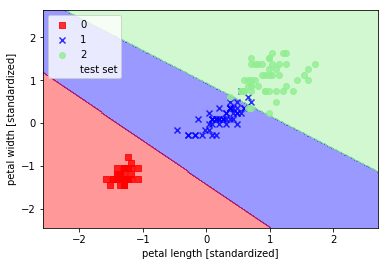

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Kernel SVM to Solve Nonlinear Problems

1st, generate an XOR dataset with random noise:

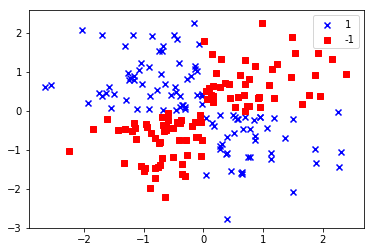

In [17]:
np.random.seed(0)
x_xor = np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:,0] > 0,x_xor[:,1] >0)
y_xor = np.where(y_xor,1,-1)

plt.scatter(x_xor[y_xor==1,0],x_xor[y_xor==1,1],
           c='b',
           marker='x',
           label='1')
plt.scatter(x_xor[y_xor==-1,0],x_xor[y_xor==-1,1],
           c='r',
           marker='s',
           label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

Idea behind kernel SVM is to create non-linear combinations of features and to project them onto a higher dimensional space via a mapping function

*Read: https://stats.stackexchange.com/questions/148638/how-to-tell-the-difference-between-linear-and-non-linear-regression-models*

#### RBF Kernel Trick (Radial Basis Function)

**"Kernel"** can be simplified to be a **similarity function** between a pair of samples.

To alter the model, we simply need to replace the kernel refence above to 'rbf'.

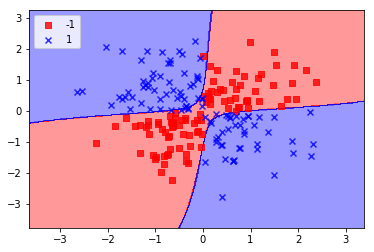

In [19]:
svm = SVC(kernel='rbf',random_state=0, gamma=0.10, C=10.0)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()


#### The Gamma variable aka the *cut-off parameter*

As gamma increases, the influence of the training samples increases, leading to a softer decision boundary.

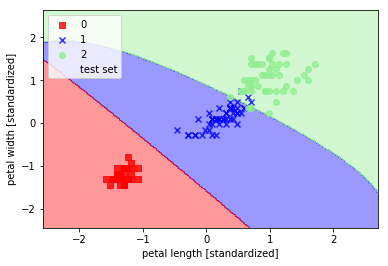

In [20]:
svm = SVC(kernel='rbf', random_state=0, gamma = 0.2, C=1.0)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#### Now ramp up that gamma!

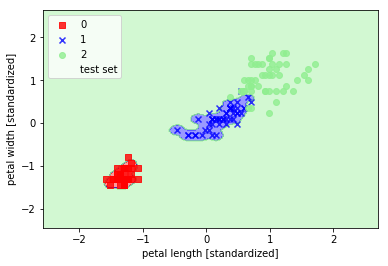

In [22]:
svm = SVC(kernel='rbf', random_state=0, gamma = 100.0, C=1.0)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# 3-4 Decision Trees

**Decision Tree** classifiers are attractive models for *interpretability*. The tree effectively is breaking down our data by making decisions based on asking a series of questions, then inferring classifiers from the answers. At each decision point, the function maximizes the information gain from the resulting split.

Often you'll find a deep tree with many nodes, leading to **overfitting**. Thus the need to *prune* the decision tree.

### Impurity (or Splitting) Criteria to drive decisions and maximize information gain: (1) Gini, (2) Entropy, (3) Classification Error

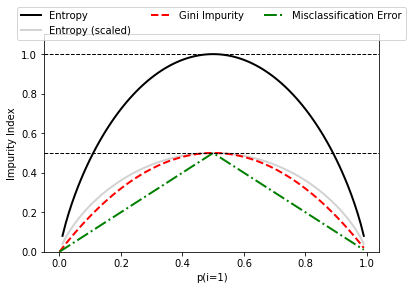

In [25]:
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))
def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
    return 1 - np.max([p,1-p])
x=np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)','Gini Impurity','Misclassification Error'],
                          ['-','-','--','-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15),ncol=3,fancybox=True,shadow=False)
ax.axhline(y=0.5, linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### Building a decision tree

To build a decision tree we can divide the feature space into rectangles, though we have to be careful since the deeper the tree the complex the decision boundary becomes, which increases the chance of overfitting.

*Note: Feature scaling is not a requirment for decision tree algorithms.*

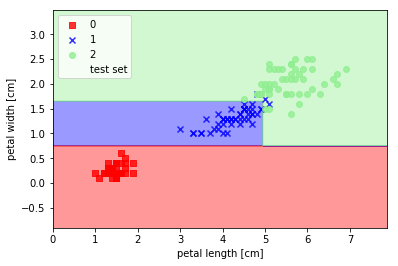

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3,
                             random_state=0)
tree.fit(x_train,y_train)
x_combined = np.vstack((x_train,x_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(x_combined,y_combined,
                     classifier=tree,
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

#### Visualize the decision tree

Paste tree.dot code from below here: http://webgraphviz.com/

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
               out_file='tree.dot',
               feature_names=['petal length','petal width'])

### Combining weak to strong learners via Random Forests

A **Random Forest** is an *ensemble* of decision trees, in which **weak learners** are combined to build a more robust model called a **strong learner** that has better generalization error and is less susceptible to overfitting. Hugely popular due to good classification performance, scalability, and ease of use.

Four simple steps for a random forest of *k* trees:
1. Draw a random **bootstrap** sample of size *n* (i.e. randomly choose *n* samples with replacement)
2. Grow a decision tree, and at each node (1) randomly select *d* features without replacement, then (2) split the node using the feature that provides the greatest information gain.
3. Repeat 1+2 *k* times
4. Aggregate the prediction by each tree to assign the class label by **majority vote**

Random forests don't offer the interpretability of decision trees, but require less "pruning" since the model is robust to the noise from individual trees. Generally, we only need decide *k* which should deliver better performance with a higher computational cost.

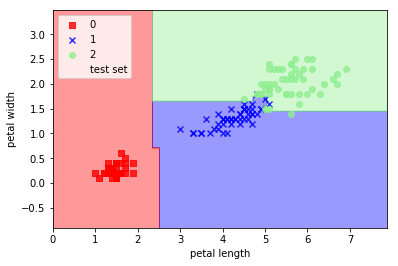

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10,
                               random_state=1,
                               n_jobs=2)
#n_estimators = k
#n_jobs parallelizes jobs across computing cores
forest.fit(x_train,y_train)
plot_decision_regions(x_combined, y_combined,
                     classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# K-nearest Neighbors - a lazy learning algorithm

KNN is called a **lazy learner** as it does not *learn* a discriminative function from the training set, but rather it memorizes the training set instead.

By specifying *k* neighbors, the algorith will use a majority vote criterion to determine the correct classification among the k-nearest neighbors. Scikit-learn will use a Euclidean distance metric for the determination of nearness.

Determination of *k* is important to find a balance between over- and underfitting.

### A quick note about **parametric** vs **non-parametric** models:

**Parametric models**: Including Perceptron, linear SVM, and logistic; these models estimate parametrs from the training data to learn a function that can classify new data points (and the training set is discarded).

**Non-parametric models**: Including non-linear SVM, decision tree/random forest, and KNN; these are not characterized by a fixed set of parameters and the number of parameters grows with training data.

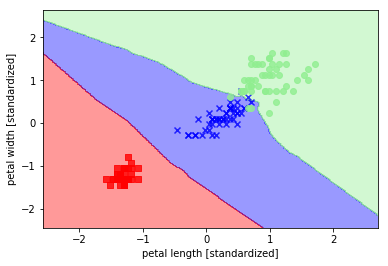

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                          p=2,
                          metric='minkowski')
knn.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std, y_combined,
                     classifier=knn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()